In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py

In [2]:
hf = h5py.File('./Test_Data/Data_test_bt.h5', 'r')
hf.keys()
temp_box=hf.get('dataset')

temp_box.shape

(1082, 128, 128, 128)

In [3]:
df= pd.read_csv('./models/3DCNN/y_test_y_pred.csv')
df

,Neutral Fraction Actual,Neutral Fraction Predicted
0,0.378985,0.345147
1,0.433975,0.452943
2,0.779497,0.715263
3,0.752975,0.712839
4,0.007976,0.014051
...,...,...
1077,0.028976,0.015073
1078,0.663370,0.635143
1079,0.065323,0.039727
1080,0.074664,0.056775


In [4]:
y_true=df['Neutral Fraction Actual']
y_pred=df['Neutral Fraction Predicted']

In [15]:
np.where((y_pred-y_true)>0.005)

(array([   1,    4,   10,   13,   15,   30,   41,   44,   46,   51,   52,
          54,   55,   57,   58,   61,   62,   63,   67,   71,   81,   82,
          86,   92,   93,   94,   96,  101,  104,  106,  108,  110,  118,
         119,  123,  124,  125,  127,  130,  131,  132,  136,  138,  140,
         143,  144,  147,  148,  149,  150,  151,  152,  154,  158,  162,
         167,  169,  178,  181,  188,  193,  199,  201,  210,  212,  214,
         215,  218,  224,  227,  234,  236,  251,  253,  255,  258,  260,
         267,  270,  272,  280,  284,  292,  301,  306,  311,  319,  321,
         324,  327,  335,  339,  341,  342,  354,  360,  361,  366,  374,
         375,  377,  380,  388,  390,  391,  392,  393,  394,  403,  405,
         406,  408,  409,  410,  412,  413,  416,  423,  433,  434,  436,
         441,  442,  447,  448,  450,  465,  467,  468,  471,  473,  481,
         482,  484,  495,  497,  502,  508,  510,  514,  520,  522,  524,
         525,  527,  528,  529,  531, 

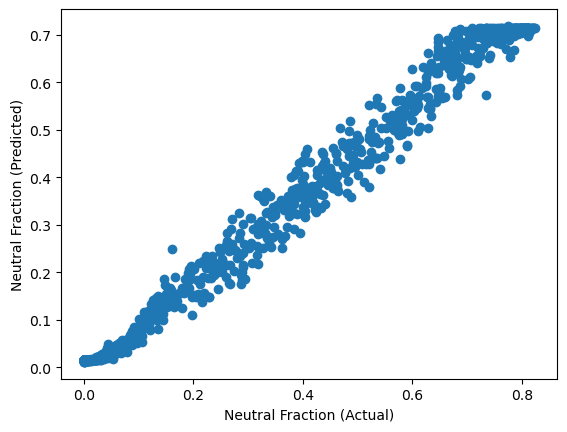

In [17]:
plt.scatter(y_true, y_pred)
plt.xlabel("Neutral Fraction (Actual)")
plt.ylabel("Neutral Fraction (Predicted)")
# plt.savefig("./models/3DCNN/y_test_y_pred_scatter.jpg")
plt.show()


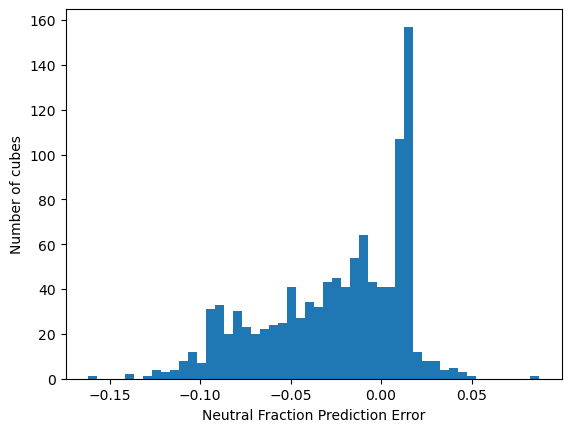

In [19]:


plt.hist(y_pred-y_true,bins=50)
plt.ylabel("Number of cubes")
plt.xlabel("Neutral Fraction Prediction Error")
plt.savefig("./models/3DCNN/y_test_y_pred_hist.jpg")
plt.show()



In [17]:
X=np.array(temp_box[:500,10])
X = X.reshape(X.shape[0],128,128,128,1)

In [19]:
X.shape

(50, 128, 128, 128, 1)

In [18]:
y=np.array(df["Neutral Fraction"])[0:50]

In [6]:
from tensorflow import keras
model = keras.models.load_model('./models/3DCNN/3DCNN.h5')

2023-03-13 11:00:27.907782: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 11:00:28.100559: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 11:00:28.100605: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 11:00:29.790405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [20]:
y_pred=model.predict(X)
y_true=y

2023-03-13 11:04:39.686995: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 8193540096 exceeds 10% of free system memory.


1/2 [==============>...............] - ETA: 5s

2023-03-13 11:04:44.418169: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 4608866304 exceeds 10% of free system memory.


2/2 [==============================] - 8s 3s/step


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [28]:

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# R-squared score (R2)
r2 = r2_score(y_true, y_pred)
print("R-squared score (R2): ", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Explained Variance Score (EVS)
evs = explained_variance_score(y_true, y_pred)
print("Explained Variance Score (EVS): ", evs)

Mean Squared Error (MSE):  0.12446257640367474
Root Mean Squared Error (RMSE):  0.3527925401757735
R-squared score (R2):  -0.757504781524865
Mean Absolute Error (MAE):  0.2707317492813207
Explained Variance Score (EVS):  0.22630493443186273


In [23]:
X.shape

(50, 128, 128, 128, 1)

In [26]:
X=X.squeeze()
X.shape

(50, 128, 128, 128)

In [27]:
for i in range(50):
    print(y_pred[i],y_true[i])

[0.01410392] 0.0068875696
[0.013989] 0.0
[0.15147544] 0.5517325
[0.01214858] 0.42438754
[0.02461782] 0.5767732
[0.00822836] 0.17699766
[0.013989] 0.0
[0.00997465] 0.2165865
[0.01400851] 0.00045633316
[0.0385427] 0.48126915
[0.01224476] 0.35252514
[0.01305759] 0.27761254
[0.01401344] 1.9073486e-06
[0.01285473] 0.26384455
[0.04507916] 0.6336746
[0.04916263] 0.6450023
[0.01920591] 0.317094
[0.02857791] 0.59759295
[0.10346864] 0.71268886
[0.0139351] 3.528595e-05
[0.01242658] 0.1408727
[0.01394594] 0.0002959523
[0.01346464] 0.005292768
[0.01587157] 0.4365425
[0.22302023] 0.7403386
[0.18783237] 0.73204327
[0.00914591] 0.28560373
[0.01394637] 0.00029246556
[0.03195892] 0.5344363
[0.01356683] 0.0007768736
[0.01709951] 0.559732
[0.01162205] 0.20027864
[0.01387489] 0.0055693374
[0.01340334] 0.11595092
[0.01586269] 0.24391608
[0.1016258] 0.5789786
[0.01337283] 0.032639753
[0.25260794] 0.7199038
[0.01692281] 0.41968733
[0.01929853] 0.4445335
[0.013989] 0.0
[0.0154333] 0.48645654
[0.01332361] 0.005

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

TypeError: Indexing elements must be in increasing order